In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

PROJECT_PATH = 'C:\\Users\\User\\visual_encoding'
data_directory = f'E:/datasets/allen_vc/manifest_files'

import sys
sys.path.append(PROJECT_PATH)
from allen_vc.epoch_extraction_tools import *
from allen_vc.plts import plot_epochs

print('Packages Imported')

Packages Imported


In [2]:
# settings
PF = 50
KERNEL_SIZE = 1*PF

In [3]:
manifest_path = os.path.join(data_directory, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
sessions = cache.get_session_table()
sessions = sessions[sessions.get('session_type')=='functional_connectivity']
sessions

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
766640955,2019-10-03T00:00:00Z,744912849,functional_connectivity,133.0,M,wt/wt,842,2233,6,"[MB, APN, NOT, DG, CA1, VISam, nan, PF, TH, LP..."
767871931,2019-10-03T00:00:00Z,753795610,functional_connectivity,135.0,M,wt/wt,713,2231,6,"[MRN, APN, MB, DG, CA1, VISrl, nan, VISam, PO,..."
768515987,2019-10-03T00:00:00Z,754477358,functional_connectivity,136.0,M,wt/wt,802,2217,6,"[MB, APN, NOT, DG, CA1, VISam, nan, Eth, LP, P..."
771160300,2019-10-03T00:00:00Z,754488979,functional_connectivity,142.0,M,wt/wt,930,2230,6,"[SCig, PPT, NOT, SUB, ProS, CA1, VISam, nan, A..."
771990200,2019-10-03T00:00:00Z,756578435,functional_connectivity,108.0,M,wt/wt,546,2229,6,"[APN, MB, DG, CA1, VISam, nan, PO, LP, VISpm, ..."
774875821,2019-10-03T00:00:00Z,759711152,functional_connectivity,114.0,M,wt/wt,649,2233,6,"[APN, LP, DG, CA1, VISrl, nan, MGv, MGd, CA3, ..."
778240327,2019-10-03T00:00:00Z,760938797,functional_connectivity,120.0,M,wt/wt,784,2234,6,"[APN, POL, LP, DG, CA1, VISrl, nan, ZI, IntG, ..."
778998620,2019-10-03T00:00:00Z,759674770,functional_connectivity,121.0,M,wt/wt,793,2229,6,"[APN, POL, LP, DG, CA3, CA1, VISrl, nan, ZI, M..."
779839471,2019-10-03T00:00:00Z,760960653,functional_connectivity,122.0,M,wt/wt,863,2220,6,"[APN, LP, MB, DG, CA1, VISrl, nan, TH, LGd, CA..."


In [4]:
session_id = 766640955
session = cache.get_session_data(session_id)
pupil_data = session.get_screen_gaze_data()
pupil_data.head()

,raw_eye_area,raw_pupil_area,raw_screen_coordinates_x_cm,raw_screen_coordinates_y_cm,raw_screen_coordinates_spherical_x_deg,raw_screen_coordinates_spherical_y_deg
Time (s),,,,,,
3.16310,0.058795,0.011054,3.969006,-1.626442,14.739801,-6.189063
3.19620,0.058669,0.011164,4.001801,-1.664556,14.852316,-6.332932
3.21337,0.058594,0.011342,4.086463,-1.686111,15.149932,-6.414260
3.24650,0.058705,0.011354,4.085960,-1.687487,15.148002,-6.419451
3.27980,0.058736,0.011374,4.101932,-1.634886,15.210047,-6.220944


# Preprocessing

In [5]:
pupil_data = pupil_data[pupil_data['raw_pupil_area'].notna()]
values = pupil_data['raw_pupil_area']
time_points = pupil_data.index

#Create uniform set of data using interpolation
model = interpolate.interp1d(time_points, values)
time = np.arange(time_points[0], time_points[-1], 1/PF)
area = model(time)

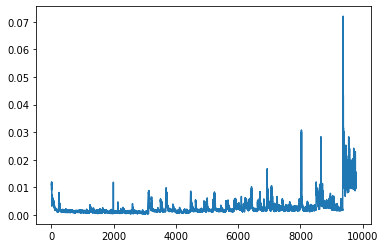

In [6]:
plt.plot(time, area);

In [7]:
from scipy.ndimage import median_filter

stim_pupil_area = area[(time > 4000) & (time < 6000)] # approx time of spontaneous block
stim_time = time[(time > 4000) & (time < 6000)]

In [8]:
stim_pupil_filt = median_filter(stim_pupil_area, KERNEL_SIZE)

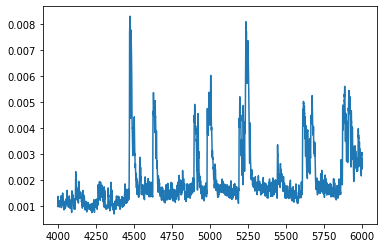

In [9]:
plt.plot(stim_time, stim_pupil_filt);

# Epoching

In [10]:
# identifying periods of dilation and constriction

In [11]:
# settings
THRESHOLD = 0
MIN_GAP = 0.5
MIN_DURATION = 5

In [12]:
area_deriv = np.diff(stim_pupil_filt)

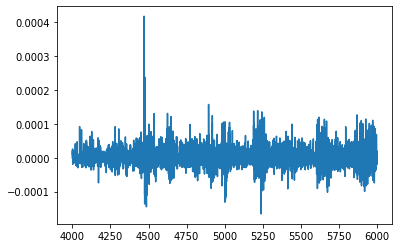

In [13]:
plt.plot(stim_time[:-1], area_deriv);

In [14]:
above, below = get_epoch_times(area_deriv, THRESHOLD, MIN_GAP, MIN_DURATION, PF)

Identified 2618 epochs
Joined 1913 / 2618 epochs
Joined 2291 / 2619 epochs
Dropped 702 / 705 epochs
Dropped 195 / 328 epochs


In [15]:
above += float(4000)
below += float(4000)

In [16]:
print(f'Found {len(above)} Above Epochs and {len(below)} Below Epochs')

Found 3 Above Epochs and 133 Below Epochs


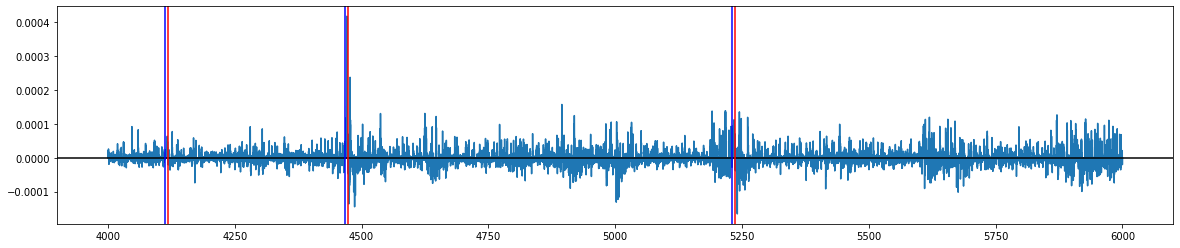

In [17]:
plot_epochs(area_deriv, stim_time[:-1], above, THRESHOLD);

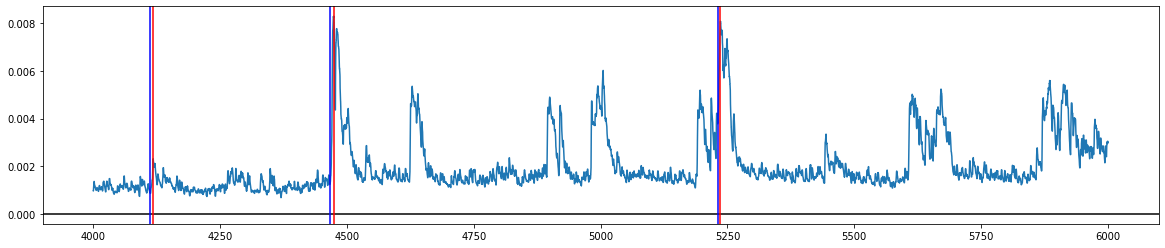

In [18]:
plot_epochs(stim_pupil_filt, stim_time, above, THRESHOLD);

In [19]:
help(plot_epochs)

Help on function plot_epochs in module allen_vc.plts:

plot_epochs(signal, time, epochs, threshold=None)
    Plots a signal over time, with annotations for epochs.
    
    Parameters
    ----------
    signal : numpy array
        Signal to be plotted.
    time : numpy array
        Time stamps for the signal.
    epochs : 2D numpy array
        Epochs to annotate.
    threshold : float, optional
        Horizontal line at given value.
    
    Returns
    -------
    fig, ax : matplotlib Figure, Axes
        Figure and axes for the plot.

